# Biodiversity in National Parks
**Author**: Lade Ogundare **Date**: 2025-07-15

## Introduction

#### Overview:
This project aims to analyze biodiversity data from the U.S. National Parks Service to understand the conservation status of species across different parks. I will be using two datasets provided by [Codecademy.com](https://codecademy.com):
* **species_info.csv** - *species details and conservation status.*
* **observations.csv** - *recorded sightings from the past 7 days.*

The goal is to identify trends in endangered species and explore broader paterns of ecological health.



## Project Scope

#### Objectives: 
* Conduct end-to-end data analysis using Python and Jupyter Notebook.
* Clean, organize, and visualize biodiversity data.
* Identify patterns and trends in species diversity and conservation status.
* Communicate findings through coding and visualizations.
* Develop a portfolio-ready project demonstrating data analysis workflow.

#### Key Questions:
1. What is the distribution of species across different national parks?
2. Which species are most commonly observed in each parks?
3. Which categories of species are most at risk of endangerment?
4. Which national park has the highest number of endangered or threatened species?
5. Are the differences between species and their conservation status significant?

#### Analysis Workflow:
1. **Project Scoping:** Define the goals, data requirements, and questions to explore.
2. **Data Setup:** Load and inspect species_info.csv and observations.csv.
3. **Data Exploration:** Summarize key statistics and explore trends in conservation status.
4. **Analysis & Visualization:** Use Python libraries (pandas, matplotlib, seaborn) to generate plots and answer the key questions.
5. **Data Cleaning:** Handle missing values, filter relevant columns, and prepare for analysis.
6. **Conclusion & Reporting:** Summarize and interpret findings.

## Data Setup

In [119]:
# import modules

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# load and inspect datasets
observations = pd.read_csv('observations.csv', encoding='utf-8')
species = pd.read_csv('species_info.csv', encoding='utf-8')

print(observations.head(20))
print(species.head(20))

print(f'Shape of the observation dataset: {observations.shape}')
print(f'Shape of the species dataset: {species.shape}')

                        scientific_name                            park_name  \
0                    Vicia benghalensis  Great Smoky Mountains National Park   
1                        Neovison vison  Great Smoky Mountains National Park   
2                     Prunus subcordata               Yosemite National Park   
3                  Abutilon theophrasti                  Bryce National Park   
4              Githopsis specularioides  Great Smoky Mountains National Park   
5     Elymus virginicus var. virginicus               Yosemite National Park   
6                      Spizella pusilla            Yellowstone National Park   
7                     Elymus multisetus  Great Smoky Mountains National Park   
8                Lysimachia quadrifolia               Yosemite National Park   
9            Diphyscium cumberlandianum            Yellowstone National Park   
10  Ludwigia peploides ssp. glabrescens                  Bryce National Park   
11                Cistothorus platensis 

## Exploratory Analysis

### Data Cleaning

Before performing any analysis, it was important to ensure the dataset was clean, consistent, and free of structural issues. This section will:
* Check for missing values across both datasets. 
* Identify and verify duplicate rows in both dataset.
* Remove any duplicate rows to avoid data skew.

These cleaning steps ensure that both datasets are consistent and ready for analysis before moving into deeper exploration.

In [123]:
# identify data types

print(f'data types for the observation dataset:\n{observations.dtypes}')
print(f'data types for the species dataset:\n{species.dtypes}')

data types for the observation dataset:
scientific_name    object
park_name          object
observations        int64
dtype: object
data types for the species dataset:
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


In [124]:
# check if we have any missing or null values
print(f'Missing values for observation:\n{observations.isna().sum()}')
print(f'Missing values for species:\n{species.isna().sum()}')

Missing values for observation:
scientific_name    0
park_name          0
observations       0
dtype: int64
Missing values for species:
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


*From the preliminary analysis, I observed that the observations dataset contains 23,296 rows and 3 columns, while the species dataset contains 5,824 rows and 4 columns. The observations table is clean, with no missing or null values.*

_However, the conservation_status column in the species dataset has 5,633 missing values, meaning nearly the entire column is null. To better understand the nature of this missingness, I will proceed to count the unique values in the column and assess whether they provide any meaningful insight into why so many values are missing._

In [126]:
# count unique data types for both observations and species
print(f'Unique value count for observations table:\n{observations.nunique()}')
print(f'Unique value count for species table: \n{species.nunique()}')

Unique value count for observations table:
scientific_name    5541
park_name             4
observations        304
dtype: int64
Unique value count for species table: 
category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64


_I’ve successfully identified the unique value counts for all columns in both datasets. Notably, the conservation_status column contains 4 unique non-null values, which suggests a limited range of conservation designations. To gain further insight into the high volume of missing entries, I will proceed to examine the actual unique values in this column._

_In addition, I will identify the distinct national parks listed in the observations dataset and the unique species categories present in the species dataset. This will help me identify the various park locations and the diversity of biological classifications represented in the data._

In [128]:
# identify unique categories in conservation_status, park_name and category columns
print(f'Unique conservation_status values:\n{species['conservation_status'].unique()}')
print(f'Park locations:\n{observations['park_name'].unique()}')
print(f'Biological classifications:\n{species['category'].unique()}')

Unique conservation_status values:
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
Park locations:
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Biological classifications:
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


_From the result above, it is reasonable to infer that species with NaN values in the conservation_status column do not have a special conservation designation. These entries likely represent species that are not currently under any form of protection or monitoring._

_For improved clarity and consistency in the analysis, I will replace the missing values with the label “No Intervention” to explicitly reflect this status._

In [130]:
# replace missing conservation_status values with 'No Intervention'
species['conservation_status'] = species['conservation_status'].fillna('No Intervention')

# check unique values for conservation_status to ensure the null values were replaced
print(f'Updated conservation status:\n{species['conservation_status'].unique()}')

Updated conservation status:
['No Intervention' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


In [131]:
# check for duplicate data in both datasets
print(f'Number of duplicate roles in the observation dataset:\n{observations.duplicated().sum()}')
print(f'Number of duplicate roles in the species datset:\n{species.duplicated().sum()}')

Number of duplicate roles in the observation dataset:
15
Number of duplicate roles in the species datset:
0


_I have identified 15 duplicate rows in the observations dataset. Before deciding whether to drop them, I will examine these rows more closely to verify whether they are true duplicates (i.e., identical in all columns) or whether they contain subtle variations that might be important for analysis._

In [133]:
# check if all duplicates are exact matches
print(f'Are all columns exact duplicates? {observations.duplicated().all()}')

# check for the total number of duplicated rows (including first instances)
print(f'Total number of duplicate rows in observation:\n{observations.duplicated(keep=False).sum()}')

# show all duplicated rows in the observation dataset
print(f'Duplicate occurences:\n{observations[observations.duplicated(keep=False)].sort_values(by=observations.columns.tolist())}')

Are all columns exact duplicates? False
Total number of duplicate rows in observation:
30
Duplicate occurences:
              scientific_name                            park_name  \
513             Arctium minus               Yosemite National Park   
10674           Arctium minus               Yosemite National Park   
4527   Botrychium virginianum            Yellowstone National Park   
20294  Botrychium virginianum            Yellowstone National Park   
14142       Cichorium intybus            Yellowstone National Park   
19392       Cichorium intybus            Yellowstone National Park   
1454   Echinochloa crus-galli  Great Smoky Mountains National Park   
7263   Echinochloa crus-galli  Great Smoky Mountains National Park   
1020     Eleocharis palustris  Great Smoky Mountains National Park   
12381    Eleocharis palustris  Great Smoky Mountains National Park   
1032      Hesperis matronalis                  Bryce National Park   
13372     Hesperis matronalis                  B

_I have confirmed that there are indeed 15 duplicate rows in the observation datset. I will proceed to drop the redundant rows to avoid skewing the analysis_

In [135]:
# drop duplicate rows in the observation datset
observations = observations.drop_duplicates()

In [136]:
# confirm there are no other duplicates in the observation dataset
print(f'Number of duplicates in observations dataset: {observations.duplicated().sum()}')

Number of duplicates in observations dataset: 0


### Full analysis & Visualization

Now that the dataset has been cleaned and all duplicates have been dropped. This section will focus on exploring the data in depth to answer key questions posed earlier. Through a combination of grouping, aggregation, and visualization techniques, I aim to uncover meaningful patterns and insights related to biodiversity and conservation efforts across national parks.

I'll start off by merging both datasets. 

In [138]:
# check if merging both tables on scientific_name would introduce any null values into the new dataset
set(observations['scientific_name'].unique()) == set(species['scientific_name'].unique())

True

In [139]:
# merge observations and species 
biodiversity_data = pd.merge(observations, species, on='scientific_name', how='left')

# inspect merged data and check for nulls
print(biodiversity_data.head(20))
print(f'Do we have any null data? {biodiversity_data.isna().any().any()}')

                        scientific_name                            park_name  \
0                    Vicia benghalensis  Great Smoky Mountains National Park   
1                        Neovison vison  Great Smoky Mountains National Park   
2                     Prunus subcordata               Yosemite National Park   
3                  Abutilon theophrasti                  Bryce National Park   
4              Githopsis specularioides  Great Smoky Mountains National Park   
5     Elymus virginicus var. virginicus               Yosemite National Park   
6                      Spizella pusilla            Yellowstone National Park   
7                     Elymus multisetus  Great Smoky Mountains National Park   
8                Lysimachia quadrifolia               Yosemite National Park   
9            Diphyscium cumberlandianum            Yellowstone National Park   
10  Ludwigia peploides ssp. glabrescens                  Bryce National Park   
11                Cistothorus platensis 

In [140]:
# distribution of species across different national parks
specie_distribution_frequency = pd.crosstab(biodiversity_data['park_name'], biodiversity_data['category'])
specie_distribution_proportion = (specie_distribution_frequency/len(biodiversity_data)) * 100

print(f'proportion of specie distribution across parks:\n{specie_distribution_proportion}') 

proportion of specie distribution across parks:
category                             Amphibian      Bird      Fish    Mammal  \
park_name                                                                      
Bryce National Park                     0.3203  2.308504  0.511699  1.171829   
Great Smoky Mountains National Park     0.3203  2.308504  0.511699  1.171829   
Yellowstone National Park               0.3203  2.296785  0.511699  1.164017   
Yosemite National Park                  0.3203  2.308504  0.511699  1.171829   

category                             Nonvascular Plant   Reptile  \
park_name                                                          
Bryce National Park                            1.30073  0.316394   
Great Smoky Mountains National Park            1.30073  0.316394   
Yellowstone National Park                      1.30073  0.316394   
Yosemite National Park                         1.30073  0.316394   

category                             Vascular Plant  
park_nam

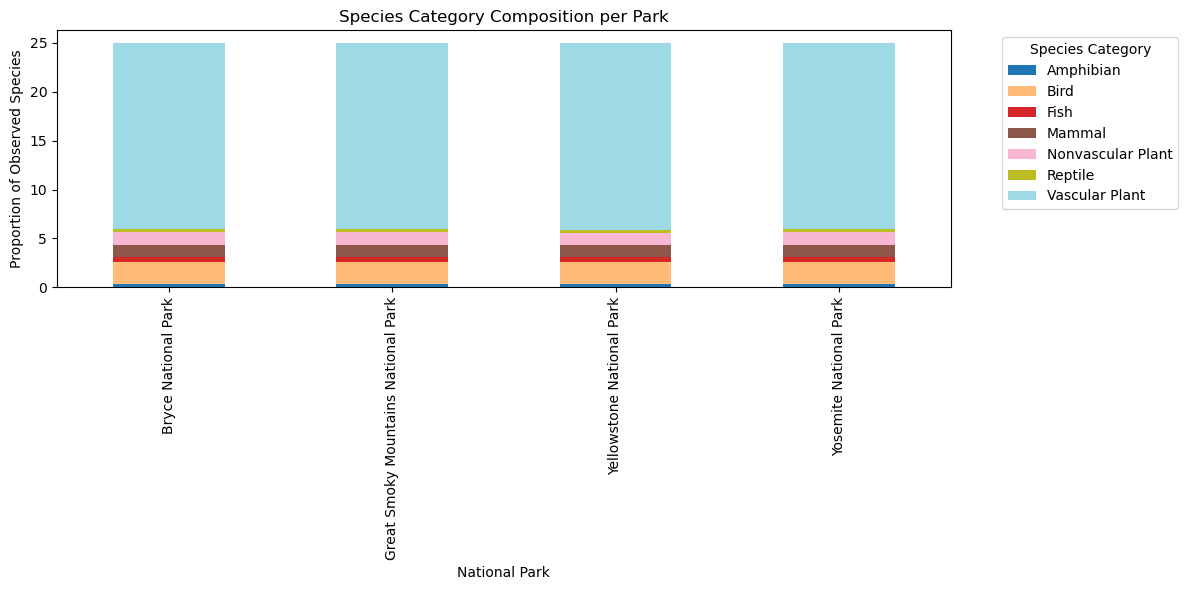

In [141]:
# plot the proportion on stacked bar chart

specie_distribution_proportion.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20'  # You can use others like 'Set3', 'Paired', etc.
)

plt.title("Species Category Composition per Park")
plt.xlabel("National Park")
plt.ylabel("Proportion of Observed Species")
plt.legend(title='Species Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [142]:
# calculate percentage of specie category overall
print(f'Overall proportion of species:\n{specie_distribution_proportion.sum().round(2)}')

Overall proportion of species:
category
Amphibian             1.28
Bird                  9.22
Fish                  2.05
Mammal                4.68
Nonvascular Plant     5.20
Reptile               1.27
Vascular Plant       76.30
dtype: float64


_The species categories appear to be relatively evenly distributed across the four national parks. In each park, vascular plants consistently make up the largest proportion of observed species — accounting for roughly 19% of each park’s biodiversity records and approximately 76% of total observations across all parks. Birds follow as the second most observed group, representing around 9% of both individual park biodiversity and the overall dataset. At the lower end, amphibians and reptiles make up only 0.3% of each park’s species records and about 1% of total observations._

In [144]:
# check for how many observations exist per category
biodiversity_data.groupby(['park_name', 'category'])['observations'].sum()

park_name                            category         
Bryce National Park                  Amphibian               7542
                                     Bird                   58590
                                     Fish                   12823
                                     Mammal                 28830
                                     Nonvascular Plant      32992
                                     Reptile                 8141
                                     Vascular Plant        484125
Great Smoky Mountains National Park  Amphibian               5876
                                     Bird                   42869
                                     Fish                    9482
                                     Mammal                 21056
                                     Nonvascular Plant      24857
                                     Reptile                 5841
                                     Vascular Plant        363998
Yellowstone National 

In [145]:
# identify and label at risk species
biodiversity_data['risk_level'] = biodiversity_data['conservation_status'].apply(
    lambda x: 'At Risk' if x in ['Endangered', 'Threatened', 'Species of Concern'] else 'Not At Risk'
)
print(biodiversity_data.head())

# most endangered species per park and category
print(f'Number of protected species per category:\n{biodiversity_data.groupby(
    ['park_name', 'category'])['scientific_name'].nunique()}'
     )


            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American Mink   
2           138  Vascular Plant                        Klamath Plum   
3            84  Vascular Plant                          Velvetleaf   
4            85  Vascular Plant                      Common Bluecup   

  conservation_status   risk_level  
0     No Intervention  Not At Risk  
1     No Intervention  Not At Risk  
2     No Intervention  Not At Risk  
3     No Interve

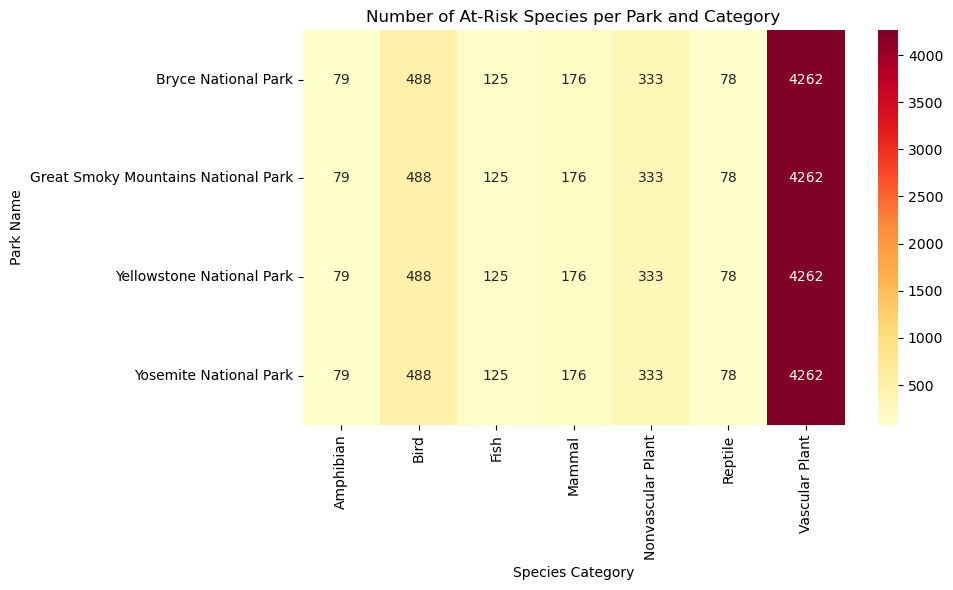

In [146]:
heatmap_data = biodiversity_data.groupby(
    ['park_name', 'category'])['scientific_name'].nunique().unstack(fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Number of At-Risk Species per Park and Category')
plt.xlabel('Species Category')
plt.ylabel('Park Name')
plt.tight_layout()
plt.show()

In [147]:
# category with the highest endangered animals
endangered_species = biodiversity_data[biodiversity_data['risk_level'] == 'At Risk']
endangered_species_by_category = endangered_species['category'].value_counts()

print(endangered_species_by_category.sort_values(ascending=False))


category
Bird                 336
Mammal               220
Vascular Plant       184
Fish                  48
Amphibian             28
Reptile               20
Nonvascular Plant     20
Name: count, dtype: int64


In [148]:
# filter endangered_species for Bird and Mammal categories and identify the name with the most amount of endangered species as well as the least amount
endangered_species_filtered = endangered_species[endangered_species['category'].isin(['Bird', 'Mammal'])]
endangered_species_filtered['extracted_common_names'] = (
    endangered_species_filtered['common_names']
    .str.lower()
    .str.split()
    .str[-1]
)
endangered_species_grouped = endangered_species_filtered.groupby(['category','extracted_common_names']).size().sort_values(ascending=False)

print(endangered_species_grouped)
print(f'Most endangered specie is:\n{endangered_species_grouped.head(1)}')

category  extracted_common_names
Mammal    myotis                    92
          bat                       44
          wolf                      28
Bird      osprey                    16
          loon                      16
                                    ..
          pelican                    4
          bluebird                   4
          pigeon                     4
          sandpiper                  4
          phainopepla                4
Length: 64, dtype: int64
Most endangered specie is:
category  extracted_common_names
Mammal    myotis                    92
dtype: int64


/var/folders/_q/3y5vyvtx3jb60d2y7wz72_pw0000gn/T/ipykernel_15822/3290271806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  endangered_species_filtered['extracted_common_names'] = (


_The results show that the categories with the highest number of at-risk species are Bird, Mammal, and Vascular Plant. To identify commonly observed endangered species within each group, I extracted the last word from each species’ common name (e.g., “red fox” → “fox”). This allowed me to group related species under broader classifications._

_Among mammals, bats appeared most frequently—particularly the myotis, which is a genus of bats. For birds, the most frequently observed endangered species was the osprey._

_While this string-based method does not account for all naming variations, it provides a simplified and interpretable way to identify which species types are most at risk._


In [150]:
# differences between species and their conservation status significant?
species_contingency = pd.crosstab(biodiversity_data['category'], biodiversity_data['conservation_status'])

from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(species_contingency)
print(f'Chi-square statistic: {chi2:.2f}')
print(f'Degrees of freedom: {dof}')
print(f'P-value: {pval:.3f}')

if pval < 0.05:
    print('There is a statistically significant relationship between species category and their conservation status.')
else:
    print('No statistically significant relationship found between species category and conservation status.')

Chi-square statistic: 3130.22
Degrees of freedom: 24
P-value: 0.000
There is a statistically significant relationship between species category and their conservation status.


## Conclusion:

This analysis explored biodiversity patterns across four U.S. national parks, focusing on species distribution, observation trends, and conservation risks.

Species were relatively evenly distributed across all parks, with vascular plants consistently comprising the largest proportion of biodiversity records (~76%). When examining conservation status, **Birds**, **Mammals**, and **Vascular Plants** emerged as the most at-risk categories. Notably, **Yellowstone National Park** had the highest number of endangered or threatened species, largely due to its high volume of vascular plant observations.

A chi-square test confirmed a **statistically significant relationship** between species category and conservation status (*p < 0.05*), suggesting that some groups face disproportionately higher conservation concerns.

To simplify common name analysis, species names were reduced to their final word (e.g., “red fox” → “fox”) to identify general trends. While this method helped surface recurring patterns (like *bats* among mammals and *osprey* among birds), it also introduced limitations by grouping some distinct species together.

**Ultimately, this project highlights the urgency of protecting vulnerable species and provides a foundation for future research into ecological patterns, risk management, and policy interventions across U.S. national parks.**